In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sber_data = pd.read_csv('data\sber_data.csv')

In [3]:
sber_data['sub_area'].nunique()

146

In [4]:
sber_data['price_doc'].max()

111111112

<Axes:xlabel='price_doc', ylabel='ecology'>

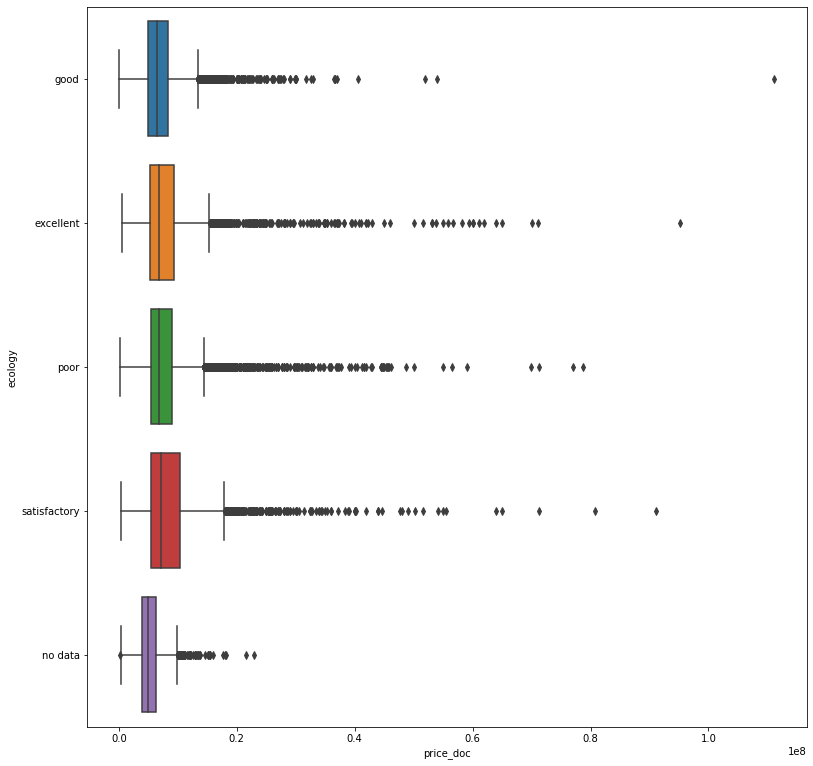

In [5]:
fig= plt.figure(figsize=(10,10))
ax=plt.axes([0,0,1,1])
sns.boxplot(
    x= sber_data['price_doc'],
    y= sber_data['ecology']
)

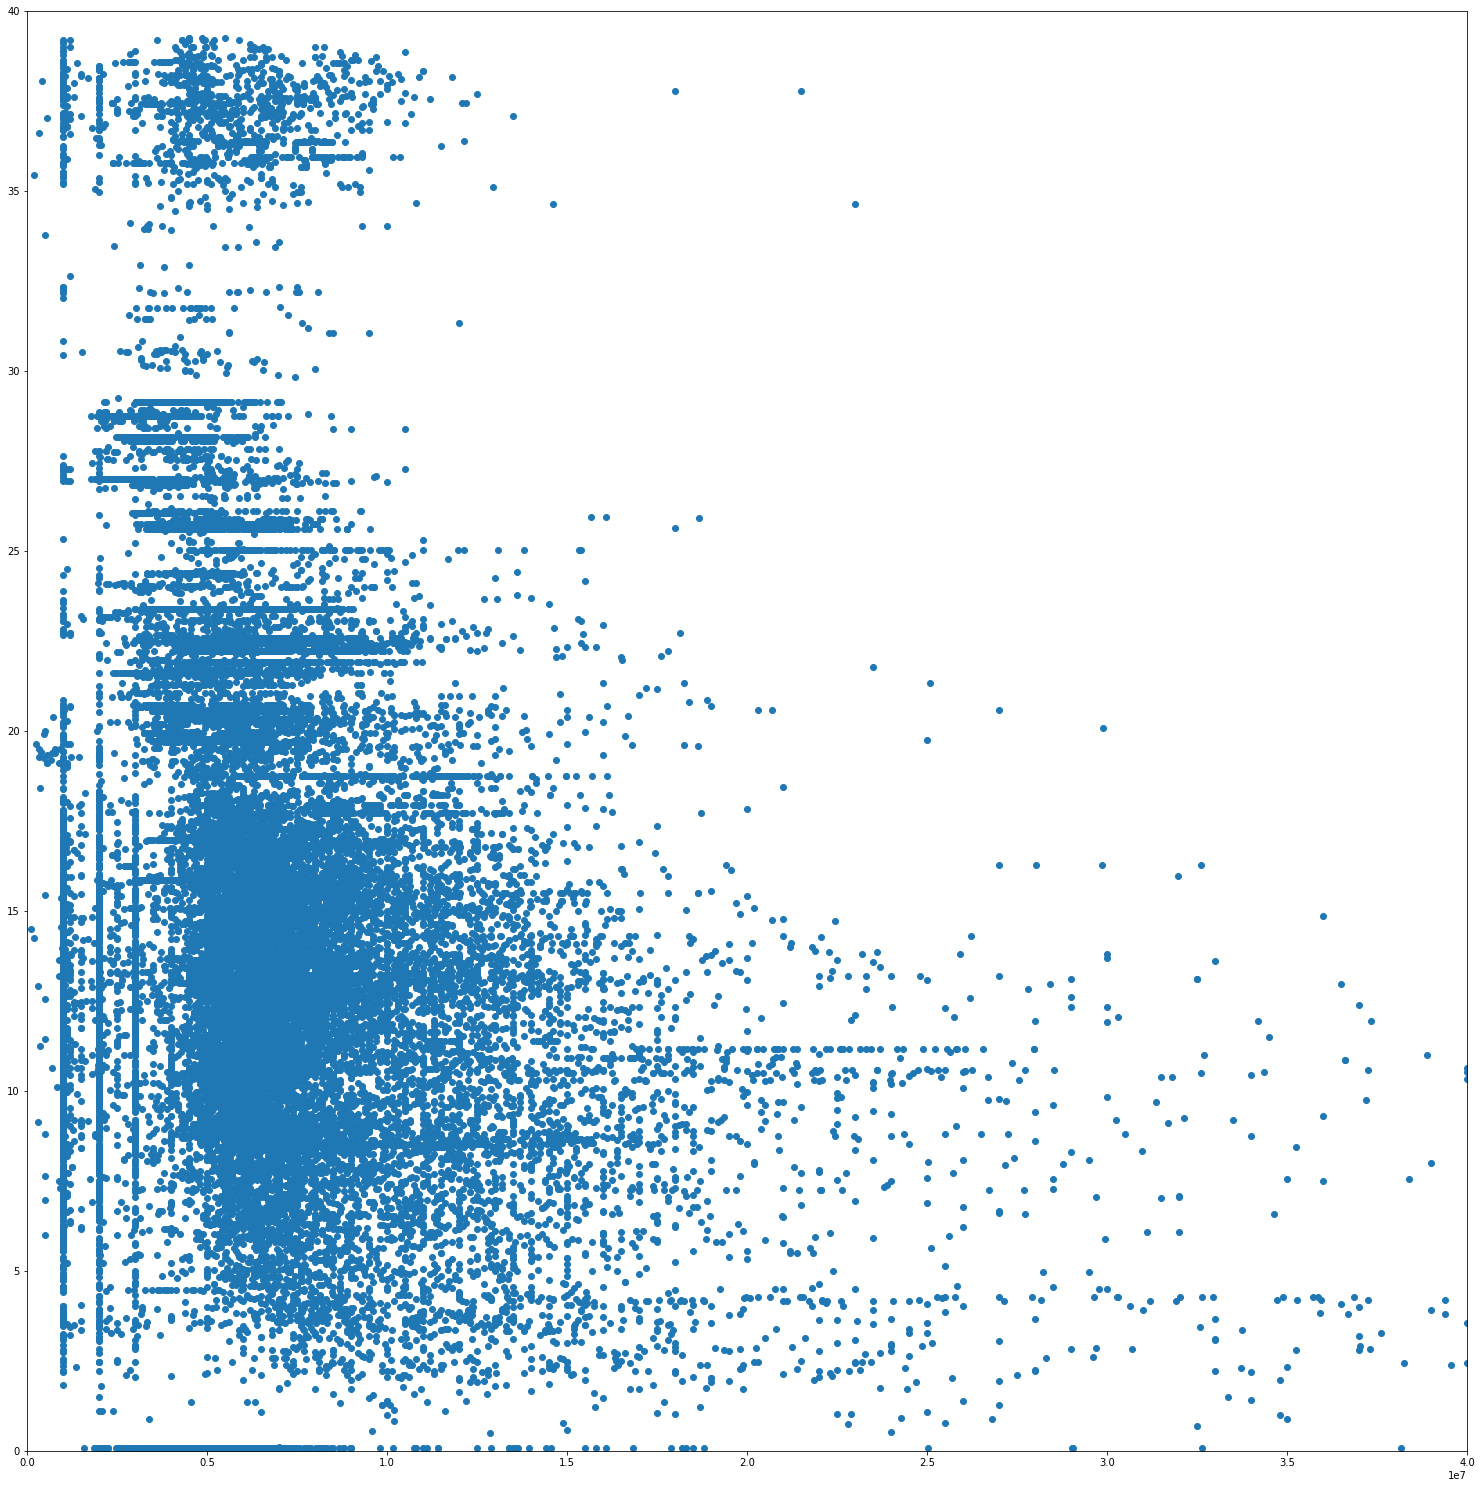

In [6]:
fig= plt.figure(figsize=(10,10))
ax=plt.axes([0,0,2,2])
plt.xlim(0,40000000)
plt.ylim(0,40)
sc = plt.scatter(
    x= sber_data['price_doc'],
    y= sber_data['kremlin_km'],
    
)

In [7]:
cols_nul_prec = sber_data.isnull().mean()*100
cols_with_nul = cols_nul_prec[cols_nul_prec>0].sort_values(ascending=False)
display(cols_with_nul)

hospital_beds_raion          47.392603
preschool_quota              21.948738
school_quota                 21.938893
life_sq                      20.947786
floor                         0.548062
metro_min_walk                0.082045
metro_km_walk                 0.082045
railroad_station_walk_km      0.082045
railroad_station_walk_min     0.082045
dtype: float64

<AxesSubplot:>

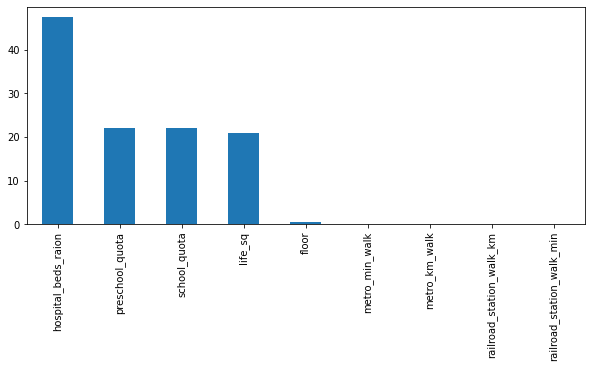

In [8]:
cols_with_nul.plot(
    kind='bar',
    figsize=(10,4)
)

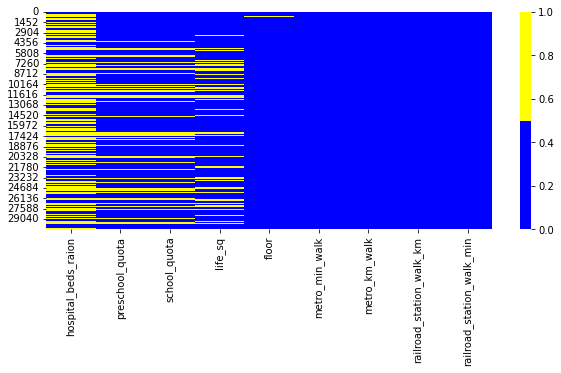

In [9]:
colors = ['blue','yellow']
fig = plt.figure(figsize=(10,4))
cols = cols_with_nul.index
ax = sns.heatmap(
    sber_data[cols].isnull(),
    cmap = sns.color_palette(colors)
)

In [10]:
drop_data = sber_data.copy()
thresh = drop_data.shape[0]*0.7
drop_data = drop_data.dropna(how='any',thresh=thresh, axis =1)
drop_data = drop_data.dropna(how='any',axis = 0 )
drop_data.isnull().mean()

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

In [11]:
drop_data.shape

(20888, 60)

array([[<AxesSubplot:title={'center':'hospital_beds_raion'}>,
        <AxesSubplot:title={'center':'preschool_quota'}>,
        <AxesSubplot:title={'center':'school_quota'}>],
       [<AxesSubplot:title={'center':'life_sq'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'metro_min_walk'}>],
       [<AxesSubplot:title={'center':'metro_km_walk'}>,
        <AxesSubplot:title={'center':'railroad_station_walk_km'}>,
        <AxesSubplot:title={'center':'railroad_station_walk_min'}>]],
      dtype=object)

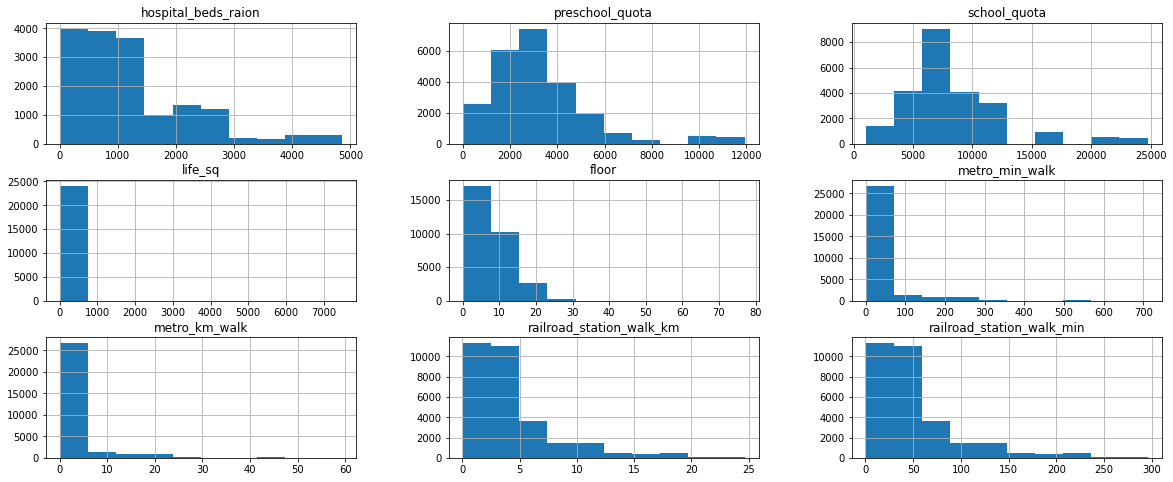

In [12]:
cols = cols_with_nul.index
sber_data[cols].hist(figsize=(20,8))

In [13]:
fill_data = sber_data.copy()
values = {
    'life_sq': fill_data['full_sq'],
    'metro_min_walk':fill_data['metro_min_walk'].median(),
    'metro_km_walk':fill_data['metro_km_walk'].median(),
    'railroad_station_walk_km':fill_data['railroad_station_walk_km'].median(),
    'hospital_beds_raion':fill_data['hospital_beds_raion'].mode()[0],
    'preschool_quota':fill_data['preschool_quota'].mode()[0],
    'school_quota':fill_data['school_quota'].mode()[0],
    'floor':fill_data['floor'].mode()[0]
}
fill_data=fill_data.fillna(values)
fill_data.isnull().mean()


id                   0.0
full_sq              0.0
life_sq              0.0
floor                0.0
sub_area             0.0
                    ... 
theater_km           0.0
museum_km            0.0
ecology              0.0
mosque_count_1000    0.0
price_doc            0.0
Length: 61, dtype: float64

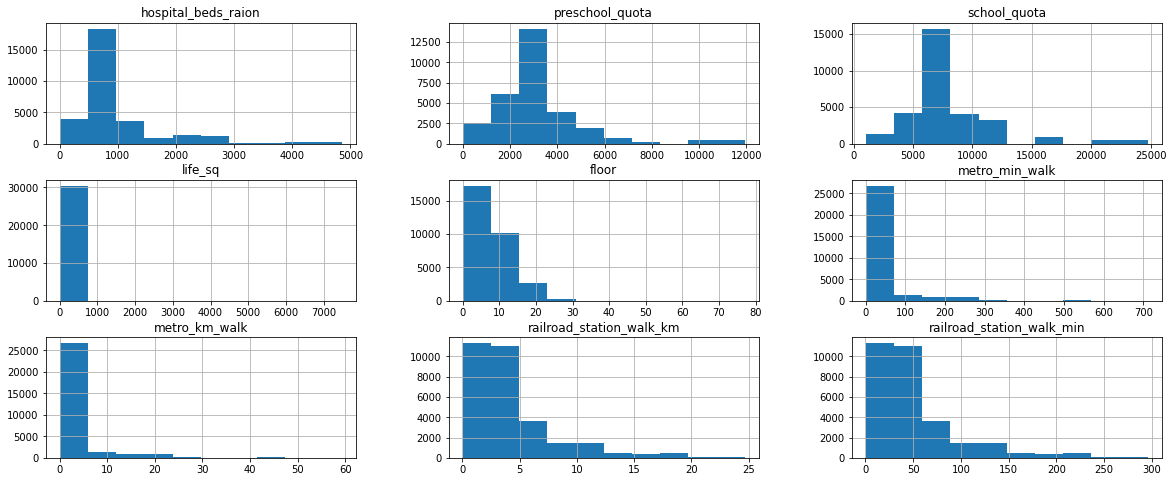

In [14]:
cols = cols_with_nul.index
fill_data[cols].hist(figsize=(20, 8));

In [15]:
indicator_data = sber_data.copy()
for col in cols_with_nul.index:
    indicator_data[col+' was null']=indicator_data[col].isnull()
values = {
    'life_sq': indicator_data['full_sq'],
    'metro_min_walk':indicator_data['metro_min_walk'].median(),
    'metro_km_walk':indicator_data['metro_km_walk'].median(),
    'railroad_station_walk_km':indicator_data['railroad_station_walk_km'].median(),
    'hospital_beds_raion':indicator_data['hospital_beds_raion'].mode()[0],
    'preschool_quota':indicator_data['preschool_quota'].mode()[0],
    'school_quota':indicator_data['school_quota'].mode()[0],
    'floor':indicator_data['floor'].mode()[0]
}
indicator_data=indicator_data.fillna(values)
indicator_data.isnull().mean()

id                                    0.0
full_sq                               0.0
life_sq                               0.0
floor                                 0.0
sub_area                              0.0
                                     ... 
floor was null                        0.0
metro_min_walk was null               0.0
metro_km_walk was null                0.0
railroad_station_walk_km was null     0.0
railroad_station_walk_min was null    0.0
Length: 70, dtype: float64

In [16]:
indicator_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,price_doc,hospital_beds_raion was null,preschool_quota was null,school_quota was null,life_sq was null,floor was null,metro_min_walk was null,metro_km_walk was null,railroad_station_walk_km was null,railroad_station_walk_min was null
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,5850000,False,False,False,False,False,False,False,False,False
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,6000000,False,False,False,False,False,False,False,False,False
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,5700000,False,False,False,False,False,False,False,False,False
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,13100000,True,False,False,False,False,False,False,False,False
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,16331452,False,False,False,False,False,False,False,False,False


In [17]:
combine_data = sber_data.copy()
n = combine_data.shape[0]
thresh = n*0.7
combine_data = combine_data.dropna(how='any',thresh=thresh,axis=1)
m = combine_data.shape[1]
combine_data=combine_data.dropna(how='any',thresh=m-2, axis=0)
values = {
    'life_sq': combine_data['full_sq'],
    'metro_min_walk': combine_data['metro_min_walk'].median(),
    'metro_km_walk': combine_data['metro_km_walk'].median(),
    'railroad_station_walk_km': combine_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': combine_data['railroad_station_walk_min'].median(),
    'preschool_quota': combine_data['preschool_quota'].mode()[0],
    'school_quota': combine_data['school_quota'].mode()[0],
    'floor': combine_data['floor'].mode()[0]
}
#заполняем оставшиеся записи константами в соответствии со словарем values
combine_data = combine_data.fillna(values)
#выводим результирующую долю пропусков
display(combine_data.isnull().mean())

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

In [18]:
combine_data.shape

(26800, 60)

In [19]:
test_data = pd.read_csv('data\\test_data.csv')
display(test_data)

,one,two,three,four,five
0,1.331587,0.715279,-1.545400,bar,NaN
1,NaN,NaN,1.000000,NaN,NaN
2,-0.008384,0.621336,-0.720086,bar,NaN
3,1.000000,0.500000,0.500000,NaN,NaN
4,0.265512,0.108549,0.004291,bar,yes
5,-0.174600,0.433026,1.203037,bar,NaN
6,NaN,NaN,1.200000,hist,NaN
7,-0.965066,1.028274,0.228630,bar,NaN


In [20]:
test_data.shape[1]

5

In [21]:
thresh = test_data.shape[0]*0.5
df = test_data.dropna(how='any',thresh=thresh,axis = 1)
thresh_2= df.shape[1]-2
df = df.dropna(how='any',thresh=thresh_2,axis=0)
values={
    'one':df['one'].mean(),
    'two':df['two'].mean(),
    'three':df['three'].mean(),
    'four':df['four'].mode()[0]
}
df = df.fillna(values)
display(df)

,one,two,three,four
0,1.331587,0.715279,-1.545400,bar
2,-0.008384,0.621336,-0.720086,bar
3,1.000000,0.500000,0.500000,bar
4,0.265512,0.108549,0.004291,bar
5,-0.174600,0.433026,1.203037,bar
6,0.241508,0.567744,1.200000,hist
7,-0.965066,1.028274,0.228630,bar


In [22]:
sber_data['life_sq'].describe()

count    24088.000000
mean        34.403271
std         52.285733
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

In [23]:
sber_data[sber_data['life_sq']==0].shape[0]

45

In [24]:
display(sber_data[sber_data['life_sq'] > 7000])

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
13546,13549,79,7478.0,8.0,Poselenie Voskresenskoe,NaN,0,NaN,0,0,...,5.072389,1.210613,0.826052,1.582378,0.756119,21.472421,14.917332,no data,0,7705000


In [25]:
outliners = sber_data[sber_data['life_sq']>sber_data['full_sq']]
outliners.shape[0]

37

In [26]:
cleaned = sber_data.drop(outliners.index,axis=0)
print(f'Результурующее значение{cleaned.shape[0]}')

Результурующее значение30434


In [27]:
display(sber_data['floor'].describe())

count    30304.000000
mean         7.670803
std          5.319989
min          0.000000
25%          3.000000
50%          6.500000
75%         11.000000
max         77.000000
Name: floor, dtype: float64

In [28]:
display(sber_data[sber_data['floor']> 50])

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
23584,23587,57,33.0,77.0,Lomonosovskoe,3091.0,5,8359.0,7,1,...,0.310557,0.731683,0.489763,0.86354,0.863266,2.920671,2.757058,satisfactory,0,13700000


Text(0.5, 1.0, 'Full Square boxplot')

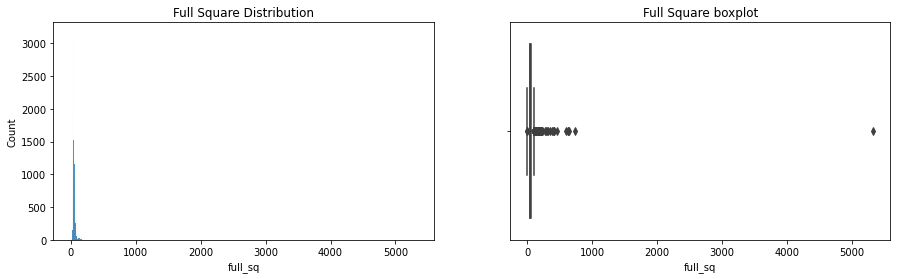

In [29]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,4))
histplot = sns.histplot(data =sber_data,
    x='full_sq',
    ax=axes[0])
histplot.set_title('Full Square Distribution')
boxplot = sns.boxplot(
    data=sber_data,
    x='full_sq',
    ax = axes[1]
)
boxplot.set_title('Full Square boxplot')

In [30]:
def outliners_iqr(data,feature,IQR=1.5):
    x=data[feature]
    quartile_1,quartile_3 = x.quantile(0.25),x.quantile(0.75)
    iqr = quartile_3-quartile_1
    lower_bound = quartile_1-(iqr * IQR)
    upper_bound = quartile_3+(iqr*IQR)
    outliners = data[(x<lower_bound)|(x>upper_bound)]
    cleaned =data[(x>lower_bound)&(x<upper_bound)]
    return outliners,cleaned

In [31]:
outliers, cleaned =outliners_iqr(sber_data, 'full_sq')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 963
Результирующее число записей: 29508


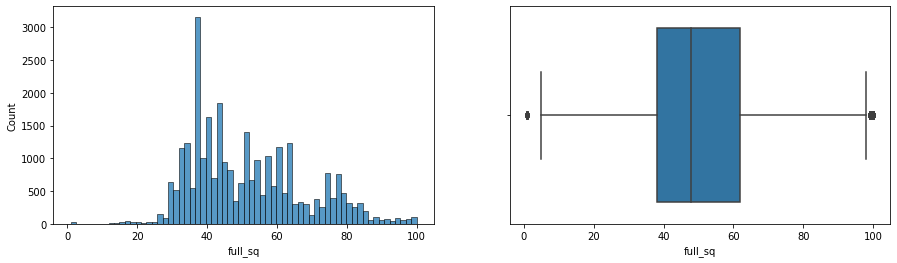

In [32]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,4))
histplot = sns.histplot(data = cleaned,x = 'full_sq',ax=axes[0])
boxplot = sns.boxplot(data = cleaned,x = 'full_sq',ax=axes[1])

In [33]:
def outliers_iqr_mod(data, feature,left=1,right=6):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [34]:
outliers, cleaned =outliers_iqr_mod(sber_data, 'full_sq')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 59
Результирующее число записей: 30403


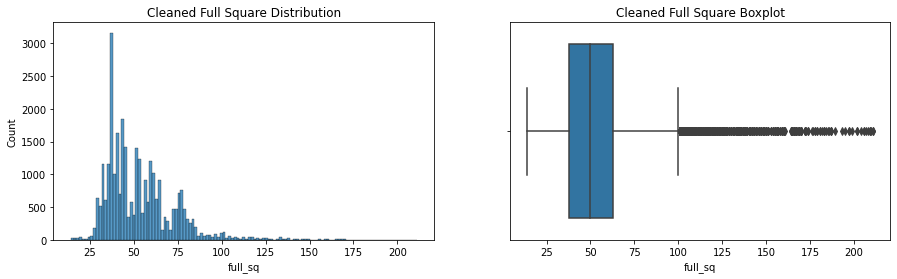

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

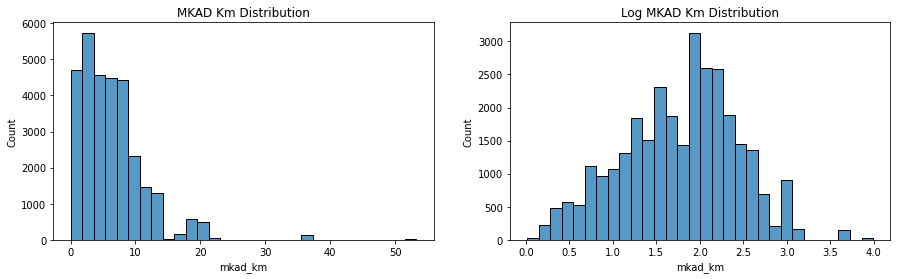

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
histplot = sns.histplot(sber_data['mkad_km'], bins=30, ax=axes[0])
histplot.set_title('MKAD Km Distribution');

#гистограмма в логарифмическом масштабе
log_mkad_km= np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km , bins=30, ax=axes[1])
histplot.set_title('Log MKAD Km Distribution');

In [37]:
def outliers_z_score(data,feature,log_scale = False):
    if log_scale==True:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu =x.mean()
    sigma = x.std()
    lower_bound = mu - 3*sigma
    upper_bound = mu + 3*sigma
    outliers = data[(x<lower_bound)|(x> upper_bound)]
    cleaned = data[(x>lower_bound)&(x< upper_bound)]
    return outliers,cleaned

In [38]:
outliers,cleaned = outliers_z_score(sber_data,'mkad_km',log_scale = True)
print(f'Число выбросов по методу z-отклонения:{outliers.shape[0]}')
print(f'Результирующее число записей:{cleaned.shape[0]}')

Число выбросов по методу z-отклонения:33
Результирующее число записей:30438


In [39]:
print(outliers['sub_area'].unique())

['Poselenie Rogovskoe' 'Poselenie Kievskij']


Text(0.5, 1.0, 'LOG MKAD Km Distribution')

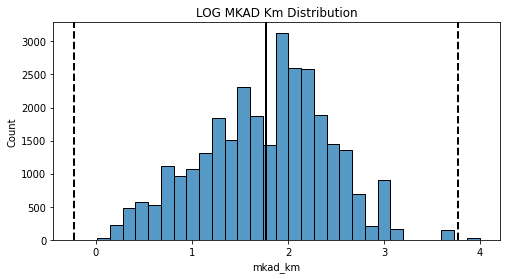

In [40]:
fig,ax = plt.subplots(1,1,figsize = (8,4))
log_mkad_km = np.log(sber_data['mkad_km']+1)
histplot =sns.histplot(log_mkad_km,bins=30,ax=ax)
histplot.axvline(log_mkad_km.mean(),color= 'k', lw=2)
histplot.axvline(log_mkad_km.mean()-3*log_mkad_km.std(),color='k',ls='--',lw=2)
histplot.axvline(log_mkad_km.mean()+3*log_mkad_km.std(),color='k',ls='--',lw=2)
histplot.set_title('LOG MKAD Km Distribution')

In [41]:
def outliers_z_score_mod(data, feature, log_scale=False, left =3 , right = 3):
    """
    Давайте расширим правило 3ех сигм, чтобы иметь возможность учитывать особенности данных.
    Добавьте в функцию outliers_z_score() параметры left и right, которые будут задавать число сигм (стандартных отклонений) 
    влево и вправо соответственно, которые определяют границы метода z-отклонения. 
    По умолчанию оба параметры равны 3
    """
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left*sigma
    upper_bound = mu +right*sigma
    outliers = data[(x<lower_bound)|(x> upper_bound)]
    cleaned = data[(x>lower_bound)&(x<  upper_bound)]
    return outliers,cleaned

In [42]:
outliers, cleaned = outliers_z_score_mod(sber_data,'mkad_km',log_scale=True,right=3.5)
print(outliers['sub_area'].unique())


[]


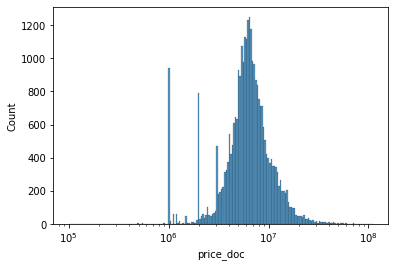

In [43]:
histplot= sns.histplot(
    sber_data,
    x = 'price_doc',
    log_scale = True
)
histplot.axvline()

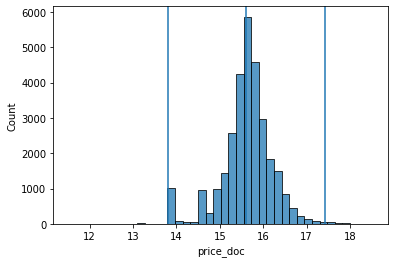

In [44]:
log_pricedoc = np.log(sber_data['price_doc']+1)
histplot= sns.histplot(
    log_pricedoc,
    bins=40
)
histplot.axvline(log_pricedoc.mean()-3*log_pricedoc.std())
histplot.axvline(log_pricedoc.mean()+3*log_pricedoc.std())
histplot.axvline(log_pricedoc.mean())

In [45]:
outliers, cleaned = outliers_z_score_mod(sber_data,'price_doc',log_scale=True,right=3.7,left=3.7)
print(outliers['price_doc'].shape[0])

52


In [46]:
def outliers_iqr_mod(data, feature,log_scale = False, left=1,right=6):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [47]:
outliers, cleaned = outliers_iqr_mod(sber_data,'price_doc',log_scale=True,right=3,left=3)
print(outliers['price_doc'].shape[0])

92


In [54]:
dupl_columns = list(sber_data.columns)
dupl_columns.remove('id')
mask=sber_data.duplicated(subset=dupl_columns)
sber_duplicates = sber_data[mask]
print(f'Число дубликатов {sber_duplicates.shape[0]}')

Число дубликатов 562


In [55]:
sber_dedupped = sber_data.drop_duplicates(subset = dupl_columns)
print(f'Результирующее число записей:{sber_dedupped.shape[0]}')

Результирующее число записей:29909


In [62]:
low_information_col =[]
for col in sber_data.columns:
    top_freq = sber_data[col].value_counts(normalize=True).max()
    nunique_ratio = sber_data[col].nunique()/sber_data[col].count()
    if top_freq>0.95:
        low_information_col.append(col)
        print(f'Одиноковых значений в колоне "{col}" : {round(top_freq*100,2)}%')
    if nunique_ratio>0.95:
        low_information_col.append(col)
        print(f'Уникальных значений в колоне "{col}" : {round(nunique_ratio*100,2)}%')    

Уникальных значений в колоне "id" : 100.0%
Одиноковых значений в колоне "oil_chemistry_raion" : 99.03%
Одиноковых значений в колоне "railroad_terminal_raion" : 96.27%
Одиноковых значений в колоне "nuclear_reactor_raion" : 97.17%
Одиноковых значений в колоне "big_road1_1line" : 97.44%
Одиноковых значений в колоне "mosque_count_1000" : 98.08%


In [67]:
information_sber_data = sber_data.drop(low_information_col,axis=1)
information_sber_data.shape[1]

55